# Cuda Study

need the execution of the file src/compilation.ipynb

## definition of the version
V1 : not recalculate the metadata if their aren't mutation \n
V2 : recalculate the metadata at once.\n
v3 : remove the modulo and copie the data of the DNA to the end to simulate the circular DNA


## get the results


In [1]:
import os
import subprocess

import experimentsDef as expDef

import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
implementation = expDef.getImplementationDetails()

experimentsHandDetails = expDef.getExpDetails()

relevantCodeVersion = ["baseline", "CUDAV1", "CUDAV2", "CUDAV3"]

experimentsRelevantDetails = {
    "perDefaultCuda" : {
        "w" : 32,
        "h" : 32,
        "g" : 5000,
        "m" : 0.00001,
    },
    "chargeGPU" : {
        "w" : 128,
        "h" : 128,
        "g" : 5000,
        "m" : 0.00001,
    },
    "chargeMoreRateGPU" : {
        "w" : 128,
        "h" : 128,
        "g" : 5000,
        "m" : 0.001,
    },
    "chargeFullRateGPU" : {
        "w" : 128,
        "h" : 128,
        "g" : 5000,
        "m" : 0.01,
    },
    "chargeLessRateGPU" : {
        "w" : 128,
        "h" : 128,
        "g" : 5000,
        "m" : 0.000001,
    },
    "chargeFullRateGPU" : {
        "w" : 128,
        "h" : 128,
        "g" : 5000,
        "m" : 0.01,
    },
#########################################################
    "GPUGraph1" : {
        "w" : 32,
        "h" : 32,
        "g" : 500,
        "m" : 0.000001,
    },
    "GPUGraph2" : {
        "w" : 32,
        "h" : 32,
        "g" : 500,
        "m" : 0.00001,
    },
    "GPUGraph3" : {
        "w" : 32,
        "h" : 32,
        "g" : 500,
        "m" : 0.0001,
    },
    "GPUGraph4" : {
        "w" : 32,
        "h" : 32,
        "g" : 500,
        "m" : 0.001,
    },
    "GPUGraph5" : {
        "w" : 32,
        "h" : 32,
        "g" : 500,
        "m" : 0.01,
    },
#########################################################
    "GPUGraphV21" : {
        "w" : 64,
        "h" : 64,
        "g" : 1000,
        "m" : 0.000001,
    },
    "GPUGraphV22" : {
        "w" : 64,
        "h" : 64,
        "g" : 1000,
        "m" : 0.00001,
    },
    "GPUGraphV23" : {
        "w" : 64,
        "h" : 64,
        "g" : 1000,
        "m" : 0.0001,
    },
    "GPUGraphV24" : {
        "w" : 64,
        "h" : 64,
        "g" : 1000,
        "m" : 0.001,
    },
    "GPUGraphV25" : {
        "w" : 64,
        "h" : 64,
        "g" : 1000,
        "m" : 0.01,
    },

    ########################################
    "GPUGraphDnaSize1" : {
        "w" : 64,
        "h" : 64,
        "g" : 500,
        "m" : 0.01,
    },

    "GPUGraphDnaSize2" : {
        "w" : 64,
        "h" : 64,
        "g" : 1000,
        "m" : 0.01,
    },

    "GPUGraphDnaSize3" : {
        "w" : 64,
        "h" : 64,
        "g" : 1500,
        "m" : 0.01,
    },

    "GPUGraphDnaSize4" : {
        "w" : 64,
        "h" : 64,
        "g" : 2000,
        "m" : 0.01,
    },

    "GPUGraphDnaSize5" : {
        "w" : 64,
        "h" : 64,
        "g" : 2500,
        "m" : 0.01,
    },

    "GPUGraphDnaSize6" : {
        "w" : 64,
        "h" : 64,
        "g" : 5000,
        "m" : 0.01,
    },
}

columnsCSV = ["Gen","Resource","Stamp","TimeStamp_Start","TimeStamp_End","Duration","Indiv_id", "exec", "w", "h", "g", "mutation_rate", "versionCode", "versionExp"]


In [3]:
aggregate = pd.DataFrame(data=None, index=None, columns=columnsCSV)
workDir = os.getcwd()

for version in relevantCodeVersion:
    for exp in experimentsRelevantDetails:
        path = os.path.join(workDir, "simulations", version, exp, "trace.csv")
        data = pd.read_csv(path, sep=',')
        data["exec"] = "nameGPU"
        data["w"] = experimentsRelevantDetails[exp]["w"]
        data["h"] = experimentsRelevantDetails[exp]["h"]
        data["dna_size"] = experimentsRelevantDetails[exp]["g"]
        data["mutation_rate"] = experimentsRelevantDetails[exp]["m"]
        data["versionCode"] = version
        data["versionExp"] = exp
        aggregate = aggregate.append(data, ignore_index=True)


## compare the results

In [4]:
df = aggregate[aggregate['Stamp'] == "STEP"]
df["Duration"] = df["Duration"].astype(float)
dfExp = df.groupby(["versionCode", "versionExp", "w", "h", "dna_size", "mutation_rate"]).mean().reset_index()

In [5]:
# get the ratio with baseline for each experiment

def getDurationRef(df, versionExp):
    print(versionExp)
    dfIn = df[(df["versionExp"] == versionExp) & (df["versionCode"] == "baseline")]
    return dfIn["Duration"].values[0]
    

dfExp["ratio"] = dfExp.apply(lambda row : getDurationRef(dfExp, row["versionExp"])/row["Duration"], axis=1)

print(dfExp)

GPUGraph1
GPUGraph2
GPUGraph3
GPUGraph4
GPUGraph5
GPUGraphDnaSize1
GPUGraphDnaSize2
GPUGraphDnaSize3
GPUGraphDnaSize4
GPUGraphDnaSize5
GPUGraphDnaSize6
GPUGraphV21
GPUGraphV22
GPUGraphV23
GPUGraphV24
GPUGraphV25
chargeFullRateGPU
chargeGPU
chargeLessRateGPU
chargeMoreRateGPU
perDefaultCuda
GPUGraph1
GPUGraph2
GPUGraph3
GPUGraph4
GPUGraph5
GPUGraphDnaSize1
GPUGraphDnaSize2
GPUGraphDnaSize3
GPUGraphDnaSize4
GPUGraphDnaSize5
GPUGraphDnaSize6
GPUGraphV21
GPUGraphV22
GPUGraphV23
GPUGraphV24
GPUGraphV25
chargeFullRateGPU
chargeGPU
chargeLessRateGPU
chargeMoreRateGPU
perDefaultCuda
GPUGraph1
GPUGraph2
GPUGraph3
GPUGraph4
GPUGraph5
GPUGraphDnaSize1
GPUGraphDnaSize2
GPUGraphDnaSize3
GPUGraphDnaSize4
GPUGraphDnaSize5
GPUGraphDnaSize6
GPUGraphV21
GPUGraphV22
GPUGraphV23
GPUGraphV24
GPUGraphV25
chargeFullRateGPU
chargeGPU
chargeLessRateGPU
chargeMoreRateGPU
perDefaultCuda
GPUGraph1
GPUGraph2
GPUGraph3
GPUGraph4
GPUGraph5
GPUGraphDnaSize1
GPUGraphDnaSize2
GPUGraphDnaSize3
GPUGraphDnaSize4
GPUGraphD

## Mutation rate

we draw a graph of performance. with some of the experiments.

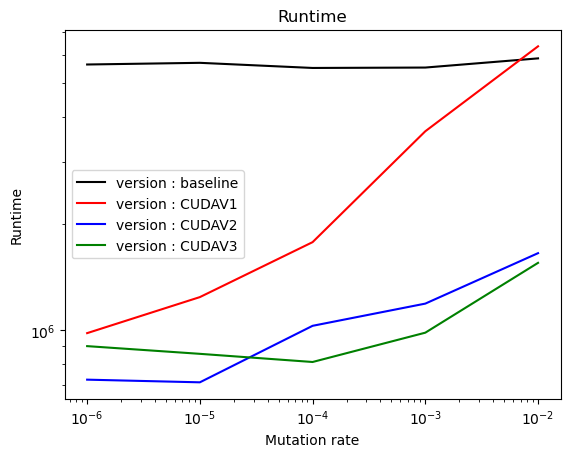

In [6]:
graph1_experiments = ["GPUGraph1", "GPUGraph2", "GPUGraph3", "GPUGraph4", "GPUGraph5"]
graph2_experiments = ["GPUGraphV21", "GPUGraphV22", "GPUGraphV23", "GPUGraphV24", "GPUGraphV25"]

dfGraph1 = dfExp[dfExp["versionExp"].isin(graph1_experiments)]
dfGraph2 = dfExp[dfExp["versionExp"].isin(graph2_experiments)]

graph_color = {"baseline" : "black", "CUDAV1" : "red", "CUDAV2" : "blue", "CUDAV3" : "green"}

for version in relevantCodeVersion:
    df_algo = dfGraph1[dfGraph1['versionCode'] == version]
    plt.plot(df_algo['mutation_rate'], df_algo['Duration'], color=graph_color[version], label="version : " + str(version))
plt.legend()
plt.title("Runtime")
plt.xlabel("Mutation rate")
plt.ylabel("Runtime")
plt.yscale('log')
plt.xscale('log')
plt.show()

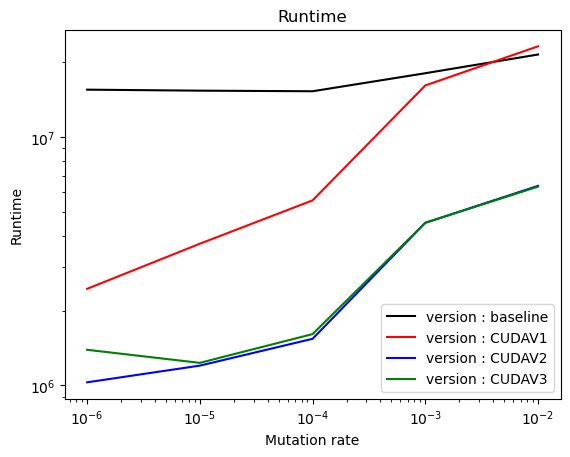

In [7]:
for version in relevantCodeVersion:
    df_algo = dfGraph2[dfGraph2['versionCode'] == version]
    plt.plot(df_algo['mutation_rate'], df_algo['Duration'], color=graph_color[version], label="version : " + str(version))
plt.legend()
plt.title("Runtime")
plt.xlabel("Mutation rate")
plt.ylabel("Runtime")
plt.yscale('log')
plt.xscale('log')
plt.show()

In [8]:
dfGraph1

,versionCode,versionExp,w,h,dna_size,mutation_rate,Duration,ratio
0,CUDAV1,GPUGraph1,32,32,500.0,0.000001,979151.3,5.769971
1,CUDAV1,GPUGraph2,32,32,500.0,0.000010,1238681.9,4.611204
2,CUDAV1,GPUGraph3,32,32,500.0,0.000100,1772869.4,3.115681
3,CUDAV1,GPUGraph4,32,32,500.0,0.001000,3654895.4,1.515316
4,CUDAV1,GPUGraph5,32,32,500.0,0.010000,6361084.4,0.924338
21,CUDAV2,GPUGraph1,32,32,500.0,0.000001,722832.4,7.816023
22,CUDAV2,GPUGraph2,32,32,500.0,0.000010,710374.8,8.040566
23,CUDAV2,GPUGraph3,32,32,500.0,0.000100,1027071.4,5.378103
24,CUDAV2,GPUGraph4,32,32,500.0,0.001000,1187190.4,4.665066
25,CUDAV2,GPUGraph5,32,32,500.0,0.010000,1649907.8,3.563709


In [9]:
dfGraph2

,versionCode,versionExp,w,h,dna_size,mutation_rate,Duration,ratio
11,CUDAV1,GPUGraphV21,64,64,1000.0,0.000001,2447842.3,6.341841
12,CUDAV1,GPUGraphV22,64,64,1000.0,0.000010,3718945.8,4.136117
13,CUDAV1,GPUGraphV23,64,64,1000.0,0.000100,5559270.4,2.751529
14,CUDAV1,GPUGraphV24,64,64,1000.0,0.001000,16138926.9,1.120247
15,CUDAV1,GPUGraphV25,64,64,1000.0,0.010000,23204284.9,0.926893
32,CUDAV2,GPUGraphV21,64,64,1000.0,0.000001,1028570.4,15.092624
33,CUDAV2,GPUGraphV22,64,64,1000.0,0.000010,1200866.7,12.809077
34,CUDAV2,GPUGraphV23,64,64,1000.0,0.000100,1540048.8,9.932474
35,CUDAV2,GPUGraphV24,64,64,1000.0,0.001000,4516198.7,4.003276
36,CUDAV2,GPUGraphV25,64,64,1000.0,0.010000,6360982.6,3.381220


We can see that we have significant improvement in the performance for the V1 for the low rate of mutation, wich is normal, because we doesn't recalculate the meta of DNA who aren't change. For the V2 and the V3, theyr are both similar and upgrade the time for high rate too. The V3 isn't better than the v2.

We will compare the algorithme for dna size know.

## DNA size

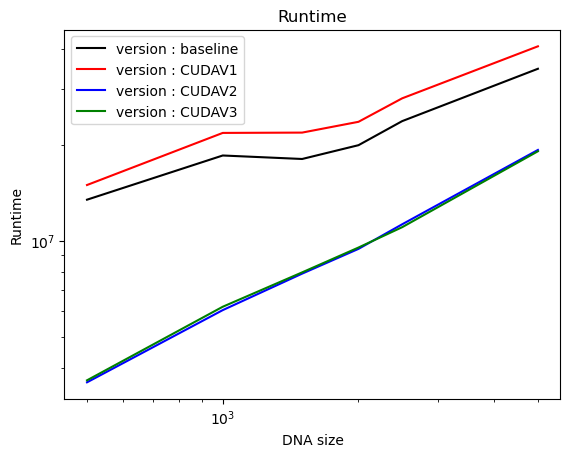

In [10]:
graph_dna_size_experiments = ["GPUGraphDnaSize1", "GPUGraphDnaSize2", "GPUGraphDnaSize3", "GPUGraphDnaSize4", "GPUGraphDnaSize5", "GPUGraphDnaSize6"]

dfGraphDnaSize = dfExp[dfExp["versionExp"].isin(graph_dna_size_experiments)]

for version in relevantCodeVersion:
    df_algo = dfGraphDnaSize[dfGraphDnaSize['versionCode'] == version]
    plt.plot(df_algo['dna_size'], df_algo['Duration'], color=graph_color[version], label="version : " + str(version))
plt.legend()
plt.title("Runtime")
plt.xlabel("DNA size")
plt.ylabel("Runtime")
plt.yscale('log')
plt.xscale('log')
plt.show()

we can see now that the the V1 isn't better than the baseline at mutation rate constant, but we have a significant improvement at the v2. The v3 is the same as the v2. 

## conclusion

The groupping of the calcul of the metadata is a proficient idea, but the elimination of the modulo doesn't upgrade the performance. Not recalculate the metadata of the DNA who aren't change upgrade only the low mutation rate cases. To improve the performance, we can transform the vector of char (DNA) into vector of bit. We can also concate all the dna into one.